<div class="alert alert-info">
Ссылка для просмотра ноутбука в интерактивном режиме для использования гиперссылок и корректного отображения разметки:<br>
<a href='https://nbviewer.org/github/yulianikola/portfolio/blob/master/data_analysis_python/5_correl_linear_regression/boston.ipynb'>boston</a></div>

### Корреляция, линейная регрессия

#### Данные о недвижимости Бостонской агломерации
http://lib.stat.cmu.edu/datasets/boston

#### Задача:
Провести эксплоративный анализ  и обучить наиболее качественно линейную модель, предсказывающую ’MEDV’.

<p id="0">
<h4>Содержание</h4>
<ul type="square"><a href="#1">Эксплоративный анализ</a><br>
Полный датасет
<ul>
    <a href="#2.1"><li>Корреляция</li></a>
    <a href="#2.2"><li>Регрессия</li></a>
</ul>
Датасет из двух групп
<ul>
    <a href="#3.1"><li>Статистики</li></a>
    <a href="#3.2"><li>Группа RAD=24</li></a>
    <a href="#3.3"><li>Группа RAD<>24</li></a>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Загружаем данные:

In [2]:
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_data = pd.read_csv(url, sep = "\s+", skiprows = 22, header = None)
array = np.hstack([raw_data.values[::2, :], raw_data.values[1::2, :3]])

In [3]:
raw_descr = pd.read_csv(url, sep = "\s+", skiprows = 7, header = None, nrows = 14 , usecols = [0])
descr = raw_descr[0].values

In [4]:
data = pd.DataFrame(data = array, columns = descr)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Описание показателей:
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per 10k dollars
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in k dollars

<p id="1">
<h4>Эксплоративный анализ</h4>

В данных 506 строк, 14 переменных. Каждая из строк представляет район/город/пригород Бостонской агломерации. Пропусков нет. Все типы данных определились как числовые, значит нет и "пропусков", выраженных другими символами:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Полных дубликатов строк нет:

In [6]:
data.duplicated(keep = False)[data.duplicated(keep = False) == True]

Series([], dtype: bool)

Посмотрим на статистики:
* Значительная разница между первым квартилем и минимумом, среднее меньше медианы у переменных AGE и B, вероятно распределения скошено влево.
* Значительная разница между третьим квартилем и максимумом у переменных: CRIM, ZN, DIS, LSTAT, вероятно распределения скошены вправо.
* Медиана значительно меньше среднего значения: CRIM, ZN, INDUS, RAD, TAX, вероятно распределения скошены вправо.
* Половина значений CRIM ниже 0.25, 75% значений меньше 3.7, максимум при этом 89 - очень значительный разброс.
* Лишь 7% районов граничат с рекой Charles (CHAS).
* Min и max значения укладываются в смысловые рамки: будем считать, что пропусков обозначенных особым числовым значением и ошибок нет.

In [7]:
pd.set_option("precision", 3)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


По описанию показатель CHAS это бинарный фактор. <br><br> Описание RAD как индекса может означать дискретный характер показателя, посмотрим на его значения. Значения равномерно идут от 1 до 8, а потом скачок до 24. В описании такого показателя в схожем датасете сказано, что чем выше индекс, тем лучше доступность радиальных магистралей. Можно было бы счесть этот показатель порядковым категориальным. Но не ясно, что означает разница между значениями 8 и 24. Районы со значением 24 значительно лучше, чем со значением 8? И эта разница больше, чем разница между значением 8 и 7? В отсутствие проясняще инфомарции удем считать этот показатель дискретным, а не категориальным.

In [8]:
data.RAD.value_counts().sort_index()

1.0      20
2.0      24
3.0      38
4.0     110
5.0     115
6.0      26
7.0      17
8.0      24
24.0    132
Name: RAD, dtype: int64

Еще глядя на статистики вызывают вопрос значения ZN и B. У показателя ZN превалирующее значение это ноль, то есть в большинстве районов нет участков более 25,000 sq.ft. Но помимо нуля у показателя довольно много значений.

In [9]:
data.ZN.value_counts().sort_index()

0.0      372
12.5      10
17.5       1
18.0       1
20.0      21
21.0       4
22.0      10
25.0      10
28.0       3
30.0       6
33.0       4
34.0       3
35.0       3
40.0       7
45.0       6
52.5       3
55.0       3
60.0       4
70.0       3
75.0       3
80.0      15
82.5       2
85.0       2
90.0       5
95.0       4
100.0      1
Name: ZN, dtype: int64

У показателя B много уникальных значений и непонятно, каков переход от пределов десяти до трехсот. Также бросается в глаза превалирующее значение - максимум 396.9. Судя по формуле этого показателя, такой максимум соотносится с минимальной пропорцией темно-кожих. При росте доли до 0.63 этот показатель снижается, а для доли от 0.63 и выше этот показатель снова растет.

In [10]:
data.B.value_counts().sort_index()

0.32        1
2.52        1
2.60        1
3.50        1
3.65        1
         ... 
396.28      1
396.30      1
396.33      1
396.42      1
396.90    121
Name: B, Length: 357, dtype: int64

Проверим насколько плавный переход в значениях B: показатель принимает значения в том числе в промежутке между первой десяткой и тремястами:

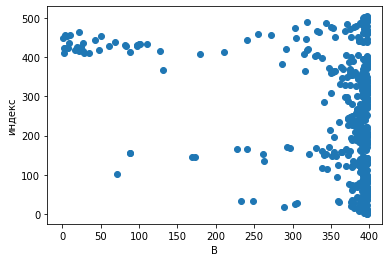

In [11]:
plt.scatter(data.B, data.index);
plt.xlabel('B');
plt.ylabel('индекс');

Посмотрим боксплоты переменных. Выбросы наблюдаются у CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT, MEDV. По смыслу значений они не кажутся ошибками.

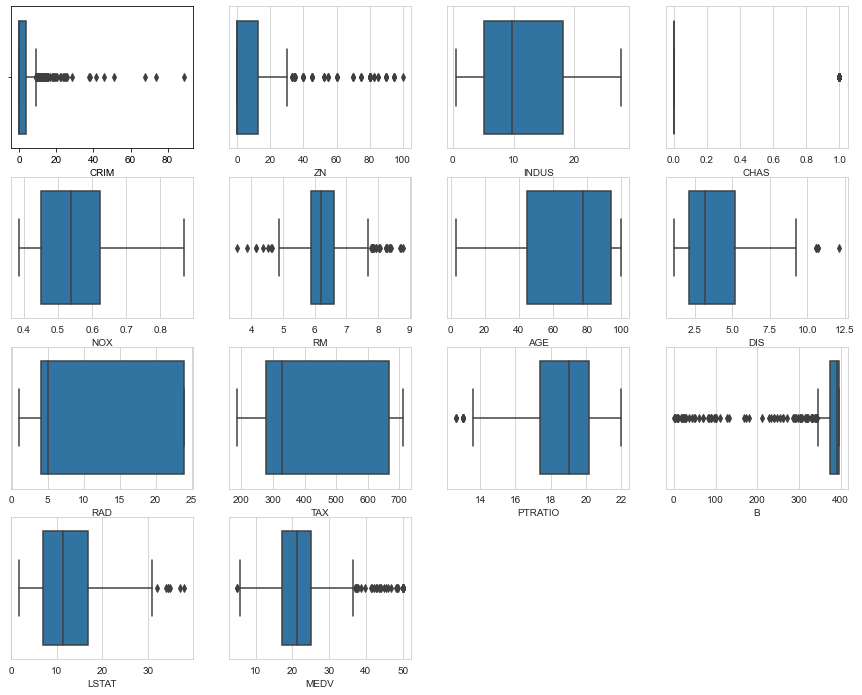

In [12]:
l = data.columns.values
number_of_columns =  4
number_of_rows = - (- len(l) // number_of_columns) # round up
plt.figure(figsize = (15, 12))
for i in range(0, len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(x = data[l[i]], data = data)

Посмотрим гистограммы переменных. Наши предположения об асимметричности распределений выше подтвердились: CRIM, ZN, DIS, LSTAT - скошены вправо, AGE и B - скошены влево. Показатели RM и MEDV имеют распределения схожие с нормальным.

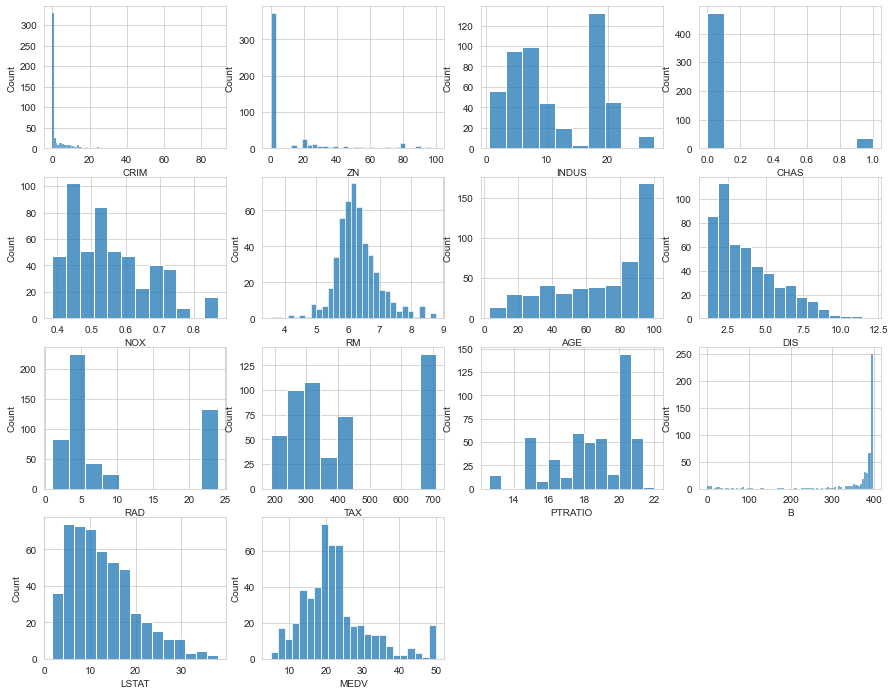

In [13]:
plt.figure(figsize = (15, 12))
for i in range(0, len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.histplot(data[l[i]])

Гистограмма TAX обнаружила "провал" в ряду значений как у RAD: скачок после 469 к 666 и 711. 

In [14]:
data.TAX.value_counts().sort_index()

187.0      1
188.0      7
193.0      8
198.0      1
216.0      5
        ... 
432.0      9
437.0     15
469.0      1
666.0    132
711.0      5
Name: TAX, Length: 66, dtype: int64

Кроме того частота значения 24 у RAD и 666 у TAX одинаковая, может это одни и те же районы? Видимо так и есть. Возможно эту подгруппу стоит рассмотреть отдельно в регрессионном анализе.

In [15]:
pd.crosstab(data[data.RAD == 24].RAD, data[data.TAX == 666].TAX)

TAX,666.0
RAD,
24.0,132


<a href="#0"><h4>Наверх</h4></a>

<h4>Часть 1 (полный датасет)</h4>
<p id="2.1">
<h5>Корреляция</h5>

Посмотрим попарные точечные графики между таргетом и остальными переменными.<br>
- Визуально наблюдается некоторая положительная линейная связь с : ZN (только для значений больше 0, при увеличении доли участков крупных площадей стоимость имеет тенденцию к увеличению), RM (при увеличении числа комнат стоимость имеет тенденцию к увеличению), В (для значений не близких к максимуму, при увеличении показателя, то есть снижении доли темно-кожих, стоимость имеет тенденцию к увеличению).<br>
- Визуально наблюдается некоторая обратная линейная связь с : NOX (при увеличении концентрации окиси азота стоимость имеет тенденцию к снижению), LSTAT (при увеличении доли населения низкого соц. положения стоимость имеет тенденцию к снижению, но возможно связь нелинейная, так как облако похоже на гиперболу).<br><br>
Корреляции по смыслу логичны.

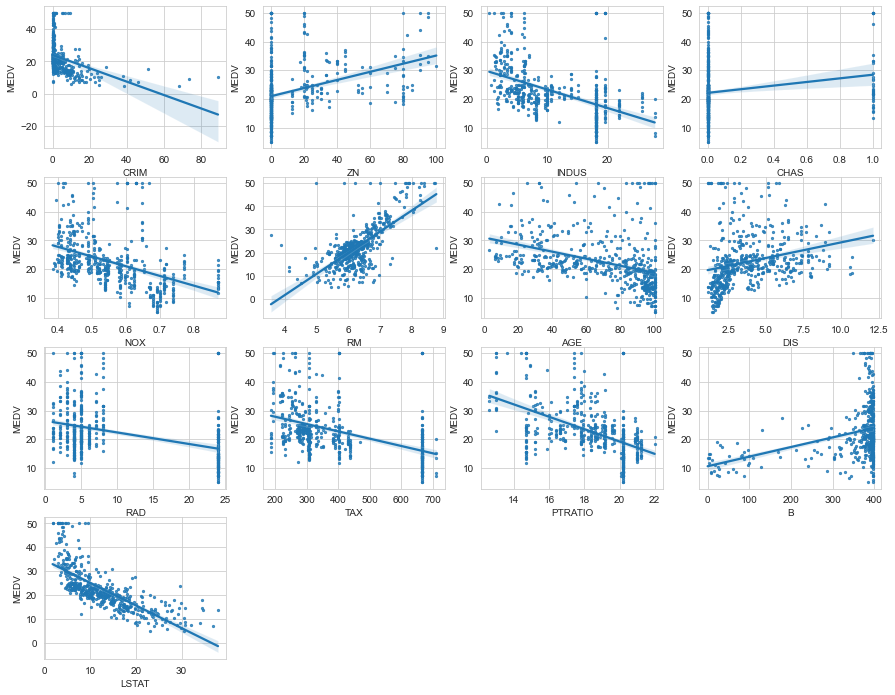

In [16]:
plt.figure(figsize = (15, 12))
for i in range(0, len(l) - 1):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.regplot(x = data[l[i]], y = data.MEDV, scatter_kws={'s':5})

Посчитаем коэффициенты корреляции Пирсона и Спирмена между всеми переменными, а не только с таргетом, чтобы проверить мультиколлинеарность.<br>
У нас все признаки количественные и это случай использования коэффициента Пирсона (кроме бинарной CHAS). Но некоторые рекомендуют использовать Спирмена в случае с отклонением от нормальности. Хотя есть мнение, что доказательства того, что Спирмен справится лучше, неочевидны. Также есть мнение, что значительное различие Пирсона и Спирмена может указывать на наличие значительных выбросов. Спирмен подразумевает не линейную, а монотонную связь. Более низкий коэффициент Спирмена по сравнению с Пирсоном может указывать на линейность связи.<br>
* Корреляция между объясняющими факторами:<br>
    * Высокая положительная линейная корреляция между RAD и TAX (0.9 Пирсон, 0.7 Спирмен). Значительная проблема с точки зрения мультиколлинеарности.<br>
    * Достаточно высокая положительная (0.7-0.75 Пирсон, Спирмен отличается незначительно): NOX и AGE, TAX и INDUS, NOX и INDUS; отрицательная: DIS и INDUS, NOX, AGE. Достаточно значительная проблема с точки зрения мультиколлинеарности.<br>
    * Спирмен в 2 раза сильнее Пирсона: CRIM и NOX (0.42 vs 0.82), AGE (0.35 vs 0.7), DIS (-0.38 vs -0.74), TAX (0.58 vs 0.73) (CRIM имеет очень асимметричное скошенное вправо распределение; значительная разница между коэффициентами может быть из-за асимметрии или нелинейности связи).
* Корреляция с таргетом:<br>
    * Достаточно высокая положительная с RM, отрицательная с LSTAT (0.7-0.75 по модулю Пирсон, Спирмен отличается не так значительно).<br>
    * Средне-слабая отрицательная PTRATIO, TAX, INDUS, NOX (0.4-0.5 Пирсон, Спирмен отличается не так значительно).<br>
    * Средняя отрицательная CRIM по Спирмену -0.56 (Пирсон -0.39).<br>

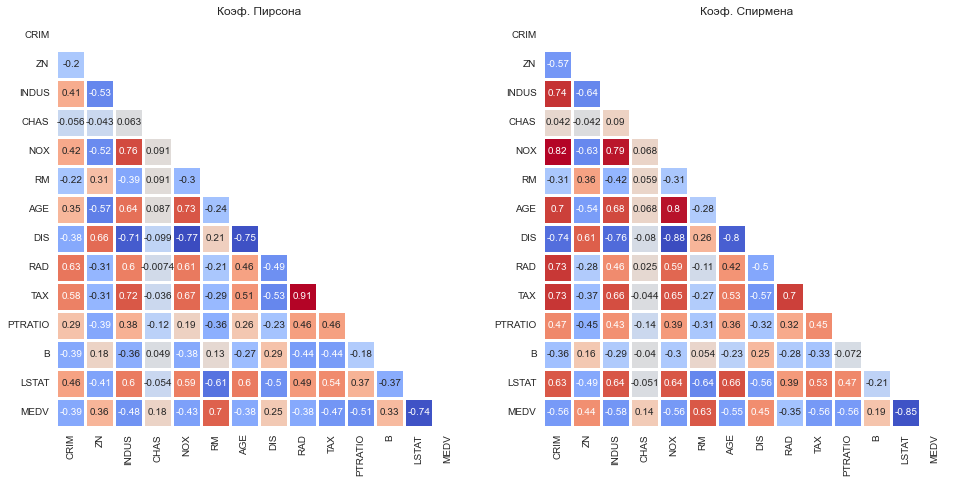

In [17]:
colors = 'coolwarm'
plt.figure(figsize = (16, 10)) 

plt.subplot(1, 2, 1)
matrix_pears = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True, cmap = colors,
            mask = matrix_pears, linewidth = 3,
            square = True, cbar = False).set_title('Коэф. Пирсона');

plt.subplot(1, 2, 2)
matrix_spear = np.triu(data.corr(method = 'spearman'))
sns.heatmap(data.corr(method = 'spearman'), annot = True, cmap = colors,
            mask = matrix_spear, linewidth = 3,
            square = True, cbar = False).set_title('Коэф. Спирмена');

Сравним средние и медианы MEDV для значений CHAS. И среднее и медиана MEDV для CHAS=1 выше чем для CHAS=0.

In [18]:
print('среднее MEDV для CHAS = 1 :', data[data.CHAS == 1].MEDV.mean())
print('среднее MEDV для CHAS = 0 :', data[data.CHAS == 0].MEDV.mean())

print('медиана MEDV для CHAS = 1 :', data[data.CHAS == 1].MEDV.median())
print('медиана MEDV для CHAS = 0 :', data[data.CHAS == 0].MEDV.median())

среднее MEDV для CHAS = 1 : 28.44
среднее MEDV для CHAS = 0 : 22.093842887473482
медиана MEDV для CHAS = 1 : 23.3
медиана MEDV для CHAS = 0 : 20.9


<a href="#0"><h4>Наверх</h4></a>

<p id="2.2">
<h5>Регрессия</h5>

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import statsmodels.api

Сначала с помощью кросс-валидации выберем модель.

Создадим функцию, которая разбивает на обучающую/тестовую выборки, проводит кросс-валидацию регресcии на обучающей выборке и возвращает среднее, медиану и ско коэффициента детерминации.

In [22]:
def linreg_cross_val (X, y, size = 0.2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = 42, shuffle = True)  
     
    cv = RepeatedKFold(n_splits = 4, n_repeats = 10, random_state = 42)
   
    scores_re = cross_val_score(LinearRegression(), X_train, y_train, scoring = 'r2',  cv = cv)

    return print('средний R2: ', round(np.mean(scores_re), 4),
                ' медианный R2: ', round(np.median(scores_re), 4),
                ' ско R2: ', round(scores_re.std(), 4))

<u>Базовая модель (все факторы, включая мультиколлинеарные).</u> <br> 
Коэф. детерминации 0.71, в модели из 13 факторов.

In [23]:
X = data[data.columns[:-1]]
y = data.MEDV
linreg_cross_val(X,y)

средний R2:  0.7174  медианный R2:  0.7209  ско R2:  0.0527


<u>Факторы с корреляцией к таргету больше 0.4 + CHAS + CRIM.</u> <br>
(из мультиколлинарных TAX-RAD остался только TAX, но есть еще NOX-INDUS, TAX-INDUS и потенциально CRIM-NOX, AGE, DIS, TAX).Коэф. детерминации снизился на 0.04.

In [24]:
cols = []
for col in data.columns[:-1]:
    if abs(data[[col,'MEDV']].corr().loc[col,'MEDV']) >= 0.4:
        cols.append(col)
print(cols + ['CHAS','CRIM'])
X = data[cols + ['CHAS','CRIM']]
linreg_cross_val(X, y)

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS', 'CRIM']
средний R2:  0.6755  медианный R2:  0.6787  ско R2:  0.0682


<u>Факторы с корреляцией к таргету больше 0.4 + CRIM </u> <br>
Исключение CHAS коэф. детерминации почти не изменило.

In [25]:
print(cols + ['CRIM'])
X = data[cols + ['CRIM']]
linreg_cross_val(X, y)

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'CRIM']
средний R2:  0.6719  медианный R2:  0.674  ско R2:  0.0693


<u>Факторы с корреляцией к таргету больше 0.4.</u> <br>
Без CHAS и CRIM коэф. детерминации такой же как с ними.

In [26]:
print(cols)
X = data[cols]
linreg_cross_val(X, y)

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
средний R2:  0.6691  медианный R2:  0.6717  ско R2:  0.0686


<u>Факторы с корреляцией к таргету больше 0.4 + только один из мультиколлинеарных INDUS/NOX/TAX.</u> <br>
Оставление в модели любого из INDUS/NOX/TAX не меняет коэф. детерминации.

In [27]:
print('с NOX,')
linreg_cross_val(data[['NOX', 'RM', 'PTRATIO', 'LSTAT']], y)
print('с INDUS,')
linreg_cross_val(data[['INDUS', 'RM', 'PTRATIO', 'LSTAT']], y)
print('с TAX,')
linreg_cross_val(data[['TAX', 'RM', 'PTRATIO', 'LSTAT']], y)

с NOX,
средний R2:  0.6694  медианный R2:  0.6685  ско R2:  0.0645
с INDUS,
средний R2:  0.6689  медианный R2:  0.6676  ско R2:  0.0628
с TAX,
средний R2:  0.6695  медианный R2:  0.6705  ско R2:  0.068


<u>Факторы с корреляцией к таргету больше 0.4 без мультиколиинеарных.</u> <br>
Исключение из модели INDUS/NOX/TAX на коэф. детерминации не повлияло.

In [28]:
X = data[['RM', 'PTRATIO', 'LSTAT']]
y = data.MEDV
linreg_cross_val(X, y)

средний R2:  0.6731  медианный R2:  0.6682  ско R2:  0.0621


Останавливаемся на модели с факторами 'RM', 'LSTAT', 'PTRATIO', так как она дает коэф. детерминации 0.67, что всего на 0.05 меньше базового и меньше на 9 факторов.

Обучаем выбранную модель на всей обучающей выборке и проверяем на тестовой. Коэф. детерминации немного ниже - 0.63. В целом основываясь на кросс-валидации и результате теста от этой модели стоит ожидать коэф.детерминации около 0.6-0.65.

In [29]:
X = data[['RM', 'PTRATIO', 'LSTAT']]
y = data.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)
    
linreg = LinearRegression()
linreg.fit(X_train, y_train)    

print("коэф. детерминации: ", round(linreg.score(X_test, y_test), 4))
print('коэффициенты', list(zip(list(X.columns), linreg.coef_)) + [('intercept', linreg.intercept_)])

коэф. детерминации:  0.6303
коэффициенты [('RM', 4.933118359418637), ('PTRATIO', -0.8670947546233052), ('LSTAT', -0.5671258827383847), ('intercept', 14.58809926157106)]


Проверим допущения линейной регресии. Посмотрим распределение остатков, в целом похоже на нормальное распределение, но скошенное вправо.

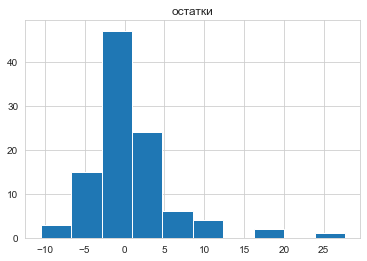

In [30]:
y_pred = linreg.predict(X_test)
plt.hist(y_test - y_pred);
plt.title('остатки');

Построим QQ plot - в значительной части точки двигаются вдоль прямой, но в правом конце сильно отдаляются. Вероятно, есть отклонение остатков от нормального распределения.

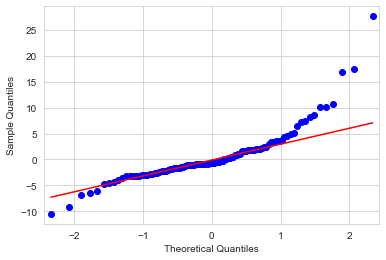

In [31]:
import warnings
warnings.filterwarnings('ignore')
statsmodels.graphics.gofplots.qqplot(y_test - y_pred, line = 'q');

Посмотрим на взаимосвязь прогнозных значений и остатков. График не выглядит хаотичным. Вариация вдоль оси х различается: больше на концах значений и меньше посередине, похоже на параболу. Не соблюдается независимость и гомоскедастиность. Облако напоминает параболу. Возможно причина в упущенной нелинейной взаимосвязи, например, с фактором LSTAT, который вызывал подозрение. Можно попробовать какую-нибудь трансформацию показателя LSTAT, которая делает его взаимосвязь с таргетом более линейной.

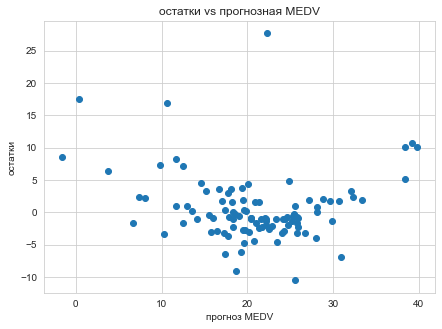

In [32]:
plt.figure(figsize = (7, 5)) 
plt.scatter(y_pred, y_test - y_pred);
plt.title('остатки vs прогнозная MEDV');
plt.xlabel('прогноз MEDV');
plt.ylabel('остатки');

<a href="#0"><h4>Наверх</h4></a>

<h4>Часть 2 (две группы)</h4><br>
Посмотрим раздельно на группы с RAD=24 и TAX=666 и остальную часть датасета.
<p id="3.1">
<h5>Статистики</h5>

Группа из 132 районов с RAD=24 и TAX=666. Значения других факторов этой группы: ZN = 0, INDUS = 18.1, PTRATIO = 20.2, DIS: 1.1-4 (vs 1.1-12 во всем датасете), AGE 40-100 (vs 3-100), NOX 0.53-0.77 (vs 0.38-0.77), CRIM 2.4-89 (vs 0.0-89). По остальным показателям min и max похожи на ситуацию в общем по датасету.

In [33]:
data_rad_tax = data[(data.RAD == 24) & (data.TAX == 666)]
data_rad_tax.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000,132.000
mean,12.759,0.000,18.100,0.061,0.672,6.022,89.805,2.061,24.000,666.000,20.200,288.089,18.601,16.404
std,13.041,0.000,0.000,0.240,0.061,0.718,12.626,0.618,0.000,0.000,0.000,145.860,6.905,8.540
min,2.379,0.000,18.100,0.000,0.532,3.561,40.300,1.130,24.000,666.000,20.200,0.320,2.960,5.000
25%,5.686,0.000,18.100,0.000,0.614,5.713,85.925,1.589,24.000,666.000,20.200,167.375,14.175,11.225
50%,9.085,0.000,18.100,0.000,0.693,6.176,94.400,1.943,24.000,666.000,20.200,373.740,17.910,14.400
75%,14.334,0.000,18.100,0.000,0.713,6.419,98.825,2.431,24.000,666.000,20.200,395.292,23.045,19.900
max,88.976,0.000,18.100,1.000,0.770,8.780,100.000,4.098,24.000,666.000,20.200,396.900,37.970,50.000


Оставшаяся часть из 374 районов: CRIM значительно более узкий диапазон значений (0-4 vs 0-89), а по остальным показателям диапазон значений как в общем по датасету.

In [34]:
data_rest = data[(data.RAD != 24)]
data_rest.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000
mean,0.386,15.374,8.679,0.072,0.513,6.377,61.082,4.407,4.449,317.262,17.840,380.880,10.554,24.696
std,0.625,25.973,6.364,0.259,0.101,0.674,28.301,2.105,1.633,81.519,2.211,39.499,5.946,8.422
min,0.006,0.000,0.460,0.000,0.385,4.903,2.900,1.322,1.000,187.000,12.600,70.800,1.730,7.000
25%,0.061,0.000,4.050,0.000,0.438,5.927,36.225,2.654,4.000,270.000,16.400,383.743,6.160,19.400
50%,0.132,0.000,6.910,0.000,0.493,6.231,62.900,4.017,4.000,305.000,18.000,392.780,9.440,22.650
75%,0.366,22.000,10.590,0.000,0.547,6.724,88.475,5.836,5.000,384.000,19.200,396.322,13.495,28.400
max,4.097,100.000,27.740,1.000,0.871,8.725,100.000,12.127,8.000,711.000,22.000,396.900,34.410,50.000


<a href="#0"><h4>Наверх</h4></a>

<p id="3.2">
<h5>Группа RAD = 24 (корреляция и регрессия)</h5>


С таргетом значительно коррелирует только LSTAT (-0.7).

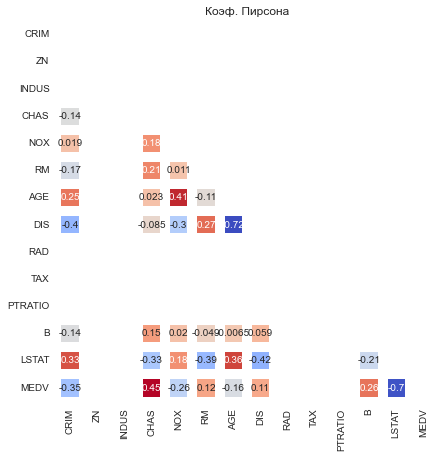

In [35]:
colors = 'coolwarm'
plt.figure(figsize = (10, 7)) 
matrix_pears_rad = np.triu(data_rad_tax.corr())
sns.heatmap(data_rad_tax.corr(), annot = True, cmap = colors,
            mask = matrix_pears_rad, linewidth = 10,
            square = True, cbar = False).set_title('Коэф. Пирсона');

И среднее и медиана MEDV для CHAS=1 выше чем для CHAS=0.

In [36]:
print('среднее MEDV для CHAS = 1 :', data_rad_tax[data_rad_tax.CHAS == 1].MEDV.mean())
print('среднее MEDV для CHAS = 0 :', data_rad_tax[data_rad_tax.CHAS == 0].MEDV.mean())

print('медиана MEDV для CHAS = 1 :', data_rad_tax[data_rad_tax.CHAS == 1].MEDV.median())
print('медиана MEDV для CHAS = 0 :', data_rad_tax[data_rad_tax.CHAS == 0].MEDV.median())

среднее MEDV для CHAS = 1 : 31.3625
среднее MEDV для CHAS = 0 : 15.438709677419354
медиана MEDV для CHAS = 1 : 22.299999999999997
медиана MEDV для CHAS = 0 : 14.1


Оценим модели регрессии на данной группе с помощью кросс-валидации на всех данных.

In [37]:
print(len(data_rad_tax))

132


In [38]:
def linreg_cross_val_2 (X, y):
    
    cv = RepeatedKFold(n_splits = 4, n_repeats = 10, random_state = 42)
   
    scores_re = cross_val_score(LinearRegression(), X, y, scoring = 'r2',  cv = cv)

    return print('средний R2: ', round(np.mean(scores_re), 4),
                ' медианный R2: ', round(np.median(scores_re), 4),
                ' ско R2: ', round(scores_re.std(), 4))

<u>Факторы, по которым есть вариативность</u><br>
Ско коэф. детерминации достаточно высокое, коэф. 0.49-0.6.

In [39]:
X = data_rad_tax[['CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','B', 'LSTAT']]
y = data_rad_tax.MEDV
linreg_cross_val_2(X,y)

средний R2:  0.4986  медианный R2:  0.605  ско R2:  0.2929


<u>Два наиболее коррелирующих фактора</u><br>
Коэф. детерминации снижается до 0.39-0.46.

In [40]:
X = data_rad_tax[['LSTAT','CHAS']]
y = data_rad_tax.MEDV
linreg_cross_val_2(X,y)

средний R2:  0.3991  медианный R2:  0.4665  ско R2:  0.296


<u>Только LSTAT</u><br>
Модель из одного фактора дала наименьший ско и коэф 0.40-0.44.

In [41]:
X = data_rad_tax[['LSTAT']]
y = data_rad_tax.MEDV
linreg_cross_val_2(X,y)

средний R2:  0.4076  медианный R2:  0.4424  ско R2:  0.2175


Группа достаточно плохо описывается линейной моделью.

<a href="#0"><h4>Наверх</h4></a>

<p id="3.3">
<h5>Группа RAD <> 24 (корреляция и регрессия)</h5>


Корреляции с таргетом похожи на корреляции на всем датасете. Корреляция таргета с RM возросла до 0.89, а LSTAT снизилась до 0.67. Риск мультиколлинеарности: NOX-CRIM, NOX-INDUS, AGE-NOX, DIS-ZN, NOX-DIS, DIS-AGE, LSTAT-RM.

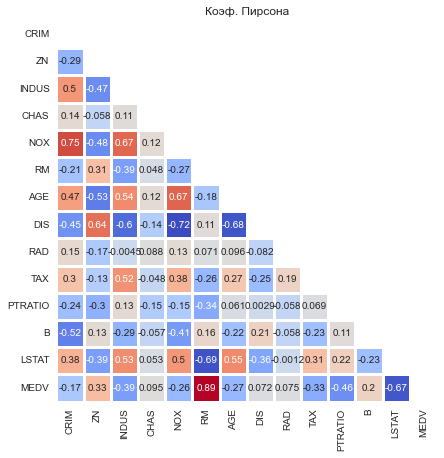

In [42]:
colors = 'coolwarm'
plt.figure(figsize = (7, 7)) 
matrix_1 = np.triu(data_rest.corr())
sns.heatmap(data_rest.corr(), annot = True, 
            cmap = colors, mask = matrix_1, linewidth = 3, 
            square = True, cbar = False).set_title('Коэф. Пирсона');

In [43]:
print(len(data_rest))

374


<u>Все факторы</u><br>
Достаточно высокий коэф детерминации 0.84, значительно выше, чем в базовой модели на всем датасете.

In [44]:
X = data_rest[data_rest.columns[:-1]]
y = data_rest.MEDV
linreg_cross_val_2(X,y)

средний R2:  0.843  медианный R2:  0.8538  ско R2:  0.0393


<u>Модель из всего датасета RM+LSTAT+PTRATIO</u><br>
Сокращение факторов в модели с 13 до 3 снижает коэф. детерминации всего на 0.02.

In [45]:
X = data_rest[['RM', 'LSTAT','PTRATIO']]
y = data_rest.MEDV
linreg_cross_val_2(X,y)

средний R2:  0.8133  медианный R2:  0.8258  ско R2:  0.0508


Данная группа описывается лучше линейной моделью, чем весь датасет. Качество моделей значительно выше. Возможно стоит разобраться, что за группа RAD=24, стоит ли ее включать в регрессионный анализ или нет.

<a href="#0"><h4>Наверх</h4></a>